In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [79]:
df1=pd.read_csv(r"C:\Users\msvar\Downloads\Unemployment in India.csv")
df2=pd.read_csv(r"C:\Users\msvar\Downloads\Unemployment_Rate_upto_11_2020.csv")

In [80]:
df = pd.merge(df1,df2,on='Region', how='left')
df.head()

,Region,Date_x,Frequency_x,Estimated Unemployment Rate (%)_x,Estimated Employed_x,Estimated Labour Participation Rate (%)_x,Area,Date_y,Frequency_y,Estimated Unemployment Rate (%)_y,Estimated Employed_y,Estimated Labour Participation Rate (%)_y,Region.1,longitude,latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-01-2020,M,5.48,16635535.0,41.02,South,15.9129,79.74
1,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,29-02-2020,M,5.83,16545652.0,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-03-2020,M,5.79,15881197.0,39.18,South,15.9129,79.74
3,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,30-04-2020,M,20.51,11336911.0,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-05-2020,M,17.43,12988845.0,36.46,South,15.9129,79.74


In [37]:
df.describe()

,Estimated Unemployment Rate (%)_x,Estimated Employed_x,Estimated Labour Participation Rate (%)_x,Estimated Unemployment Rate (%)_y,Estimated Employed_y,Estimated Labour Participation Rate (%)_y,longitude,latitude
count,7237.000000,7.237000e+03,7237.00000,7225.000000,7.225000e+03,7225.000000,7225.000000,7225.000000
mean,11.733765,7.356274e+06,42.66775,12.247831,1.437639e+07,41.673129,22.722000,80.459972
std,10.785441,8.108872e+06,8.16451,10.803037,1.337104e+07,7.850786,6.201542,5.772845
min,0.000000,4.942000e+04,13.33000,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.640000,1.576480e+06,38.07000,4.920000,3.119274e+06,37.240000,18.112400,76.085600
50%,8.200000,4.855393e+06,41.20000,9.650000,9.975485e+06,40.390000,23.610200,79.019300
75%,15.730000,1.135966e+07,45.59000,16.830000,2.268803e+07,44.190000,27.023800,85.098500
max,76.740000,4.577751e+07,72.57000,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [38]:
df.dtypes

Region                                         object
 Date_x                                        object
 Frequency_x                                   object
 Estimated Unemployment Rate (%)_x            float64
 Estimated Employed_x                         float64
 Estimated Labour Participation Rate (%)_x    float64
Area                                           object
 Date_y                                        object
 Frequency_y                                   object
 Estimated Unemployment Rate (%)_y            float64
 Estimated Employed_y                         float64
 Estimated Labour Participation Rate (%)_y    float64
Region.1                                       object
longitude                                     float64
latitude                                      float64
dtype: object

In [39]:
df.shape

(7265, 15)

In [40]:
df.isnull().sum().sort_values(ascending=False)

latitude                                      40
longitude                                     40
Region.1                                      40
 Estimated Labour Participation Rate (%)_y    40
 Estimated Employed_y                         40
 Estimated Unemployment Rate (%)_y            40
 Frequency_y                                  40
 Date_y                                       40
Area                                          28
 Estimated Labour Participation Rate (%)_x    28
 Estimated Employed_x                         28
 Estimated Unemployment Rate (%)_x            28
 Frequency_x                                  28
 Date_x                                       28
Region                                        28
dtype: int64

In [41]:
numerical_columns = df.select_dtypes(include=['float', 'int']).columns
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [42]:
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    mode_val = df[col].mode().iloc[0]
    df[col].fillna(mode_val, inplace=True)


In [43]:
df.isnull().sum().sort_values(ascending=False)

latitude                                      0
longitude                                     0
Region.1                                      0
 Estimated Labour Participation Rate (%)_y    0
 Estimated Employed_y                         0
 Estimated Unemployment Rate (%)_y            0
 Frequency_y                                  0
 Date_y                                       0
Area                                          0
 Estimated Labour Participation Rate (%)_x    0
 Estimated Employed_x                         0
 Estimated Unemployment Rate (%)_x            0
 Frequency_x                                  0
 Date_x                                       0
Region                                        0
dtype: int64

In [44]:
df.columns

Index(['Region', ' Date_x', ' Frequency_x',
       ' Estimated Unemployment Rate (%)_x', ' Estimated Employed_x',
       ' Estimated Labour Participation Rate (%)_x', 'Area', ' Date_y',
       ' Frequency_y', ' Estimated Unemployment Rate (%)_y',
       ' Estimated Employed_y', ' Estimated Labour Participation Rate (%)_y',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [45]:
df.Region.value_counts()

Andhra Pradesh      308
Kerala              280
Delhi               280
Jharkhand           280
Tamil Nadu          280
Rajasthan           280
Haryana             280
Gujarat             280
Uttar Pradesh       280
Chhattisgarh        280
West Bengal         280
Punjab              280
Karnataka           280
Telangana           280
Himachal Pradesh    280
Madhya Pradesh      280
Maharashtra         280
Tripura             280
Odisha              280
Bihar               280
Uttarakhand         270
Meghalaya           270
Assam               260
Puducherry          260
Goa                 240
Jammu & Kashmir     189
Sikkim              136
Chandigarh           12
Name: Region, dtype: int64

In [46]:
for i in df.columns:
    print(f"Unique{i}'s count:{df[i].nunique()}")
    print("f{df[i].unique()}\n")

UniqueRegion's count:28
f{df[i].unique()}

Unique Date_x's count:14
f{df[i].unique()}

Unique Frequency_x's count:2
f{df[i].unique()}

Unique Estimated Unemployment Rate (%)_x's count:625
f{df[i].unique()}

Unique Estimated Employed_x's count:741
f{df[i].unique()}

Unique Estimated Labour Participation Rate (%)_x's count:627
f{df[i].unique()}

UniqueArea's count:2
f{df[i].unique()}

Unique Date_y's count:10
f{df[i].unique()}

Unique Frequency_y's count:1
f{df[i].unique()}

Unique Estimated Unemployment Rate (%)_y's count:253
f{df[i].unique()}

Unique Estimated Employed_y's count:268
f{df[i].unique()}

Unique Estimated Labour Participation Rate (%)_y's count:249
f{df[i].unique()}

UniqueRegion.1's count:5
f{df[i].unique()}

Uniquelongitude's count:28
f{df[i].unique()}

Uniquelatitude's count:25
f{df[i].unique()}



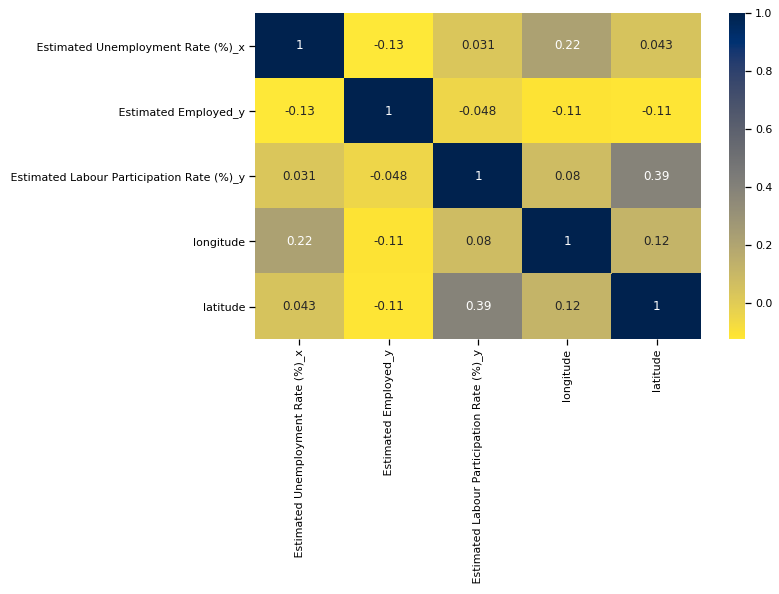

In [56]:
heat_maps = df[[' Estimated Unemployment Rate (%)_x',
       ' Estimated Employed_y', ' Estimated Labour Participation Rate (%)_y',
       'longitude', 'latitude',
               ]]

heat_maps = heat_maps.corr()
plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='cividis_r');


In [66]:
df['Date_x'] = pd.to_datetime(df[' Date_x'])
df['Date_y'] = pd.to_datetime(df[' Date_y'])


C:\Users\msvar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


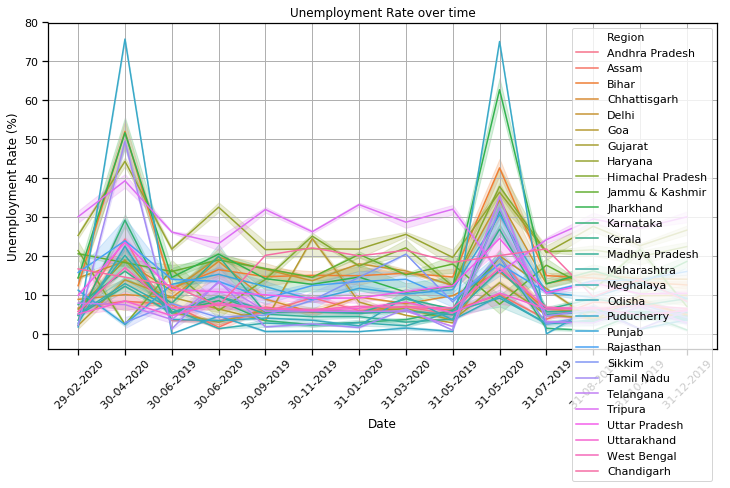

In [67]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=' Date_x', y=' Estimated Unemployment Rate (%)_x', hue='Region')
plt.title('Unemployment Rate over time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

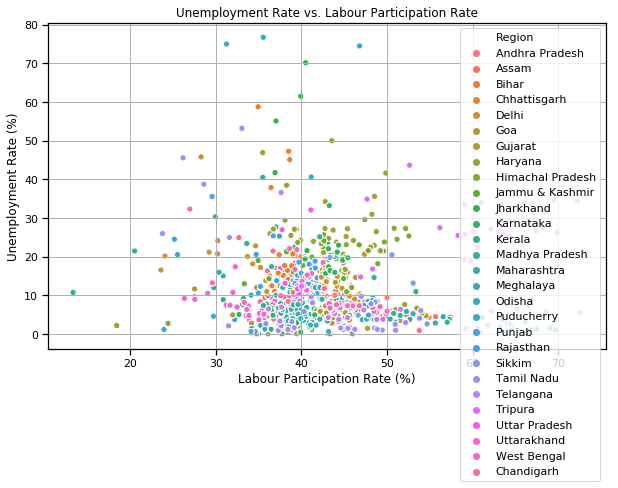

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=' Estimated Labour Participation Rate (%)_x', y=' Estimated Unemployment Rate (%)_x', hue='Region')
plt.title('Unemployment Rate vs. Labour Participation Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

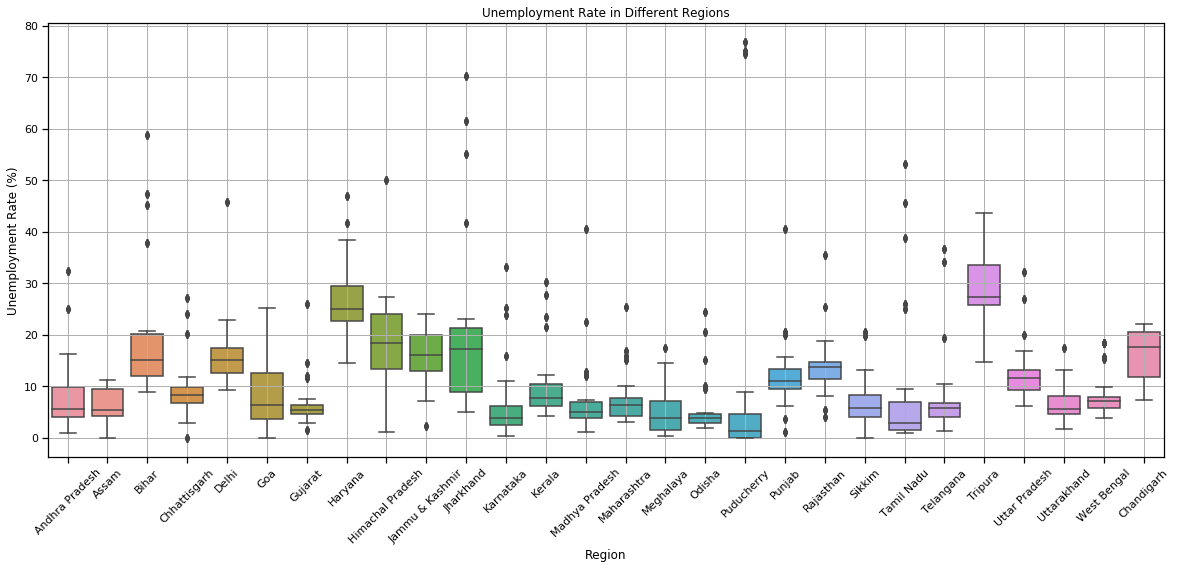

In [71]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, x='Region', y=' Estimated Unemployment Rate (%)_x')
plt.title('Unemployment Rate in Different Regions')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

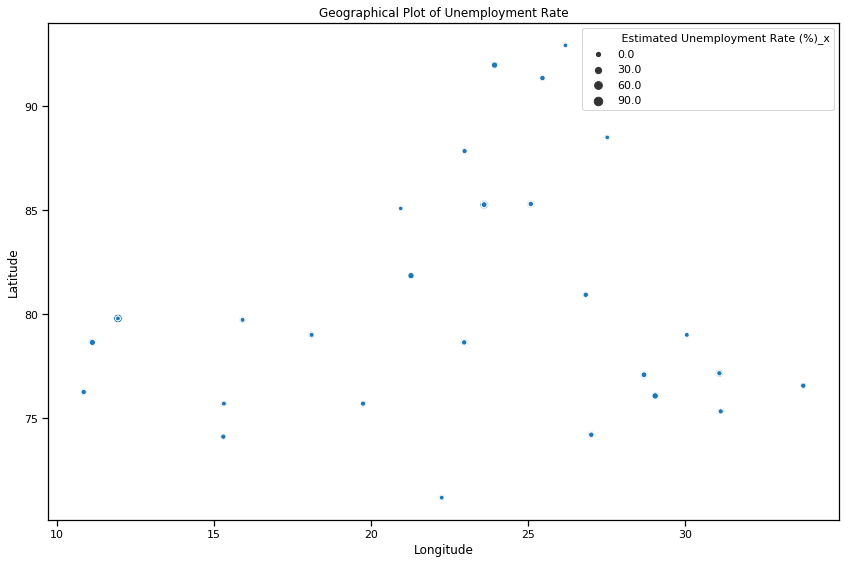

In [87]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', size=' Estimated Unemployment Rate (%)_x', data=df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Plot of Unemployment Rate')
plt.tight_layout()
plt.show()

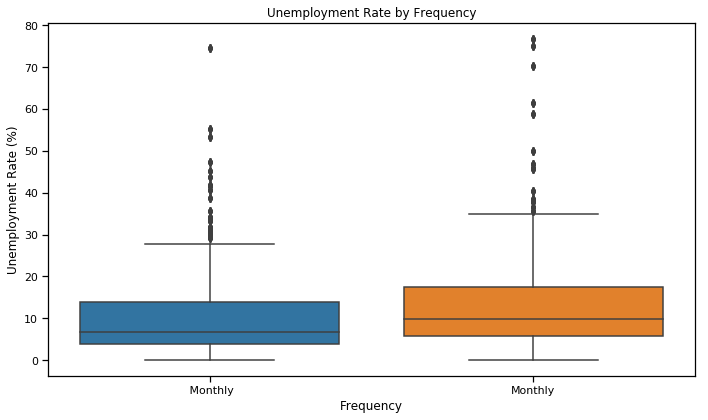

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=' Frequency_x', y=' Estimated Unemployment Rate (%)_x', data=df)
plt.xlabel('Frequency')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate by Frequency')
plt.tight_layout()
plt.show()